# Algoritma
+ Işık eğrisinden LMC Sefeide ait ortalama periyodu hesapla, ve max zamanlara ait görünür parlaklığı not et.
+ Periyod - Mutlak Parlaklık grafiğinden ortalama periyodun logaritmasını al ve grafikte karşılık gelen Mutlak parlaklığı bul.
+ Pogson formülünden türetilmiş uzaklık modülünü kullanarak LMC Sefeide ait uzaklığı tayin et.

# Dökümandaki verileri Python'a aktarma
Bize verilen dökümanın üzerinden ekran görüntüsü alınarak bu verileredeki her noktaya diktörtgen çizilgerek grafikten okuma metodu ile veriler python da listelerin içine aktarılmıştır. Ekran görüntüsünü [tldraw](https://www.tldraw.com/r) sitesine atıp üzerine dikdörtgenlner çizilip veri okunmuştur. Hocam aslında bu tldraw'ın jupyter notbook üzerinde kullanımı ile ilgili bir python paketi vardı ama yeni geliştirme aşamasında bu yüzden bu dosyada kullanmadım. Normalde bu dosya üzerinde kullanabiliyorduk.

<img src="./lmc-light-curve.png" width="80%" height="50%">


Işık eğrisinin ortalama periyodu yaklaşık olarak 4.75 gündür.


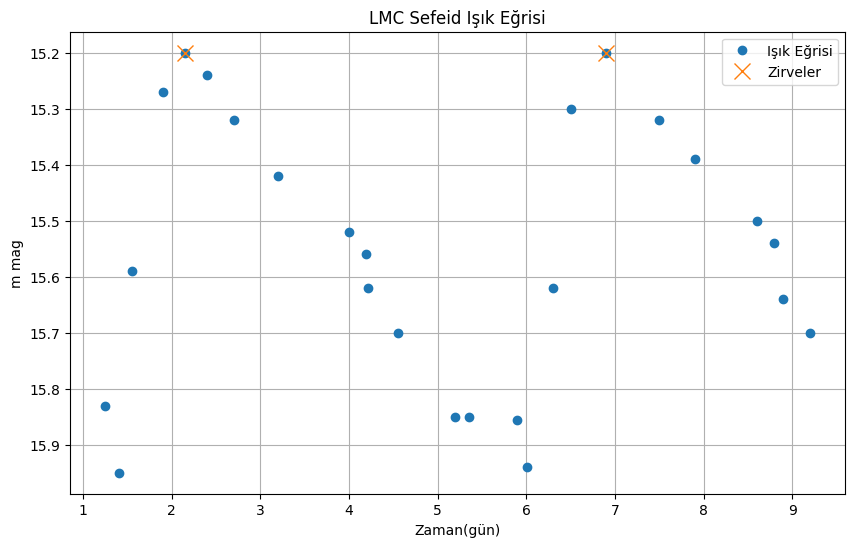

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Verilen veriler
m_mag = [15.83, 15.95, 15.59, 15.27, 15.20, 15.24, 15.32, 15.42, 15.52, 15.56, 15.62, 15.70, 15.85, 15.85, 15.855, 15.94, 15.62, 15.30, 15.20, 15.32, 15.39, 15.50, 15.54, 15.64, 15.70]
time = [1.25, 1.4, 1.55, 1.9, 2.15, 2.4, 2.7, 3.2, 4, 4.19, 4.21, 4.55, 5.2, 5.35, 5.9, 6.01, 6.3, 6.5, 6.9, 7.5, 7.9, 8.6, 8.8, 8.9, 9.2]

# Işık eğrisini çiz
plt.figure(figsize=(10, 6))
plt.plot(time, m_mag, "o", label="Işık Eğrisi")

# Zirveleri bul (m_mag değerlerinin negatifini alarak)
peaks, _ = find_peaks(-np.array(m_mag))

# Zirveleri grafikte göster
plt.plot(np.array(time)[peaks], np.array(m_mag)[peaks], "x", label="Zirveler",markersize=12)

# Zirveler arasındaki periyotları hesapla
periods = np.diff(np.array(time)[peaks])

# Ortalama periyodu hesapla
if len(periods) > 0:
    average_period = np.mean(periods)
    print(f"Işık eğrisinin ortalama periyodu yaklaşık olarak {average_period:.2f} gündür.")
else:
    print("Yeterli zirve bulunamadı, periyot hesaplanamıyor.")

# Y eksenini ters çevir
plt.gca().invert_yaxis()


# Izgara, başlık ve etiketleri ekle
plt.grid()
plt.title("LMC Sefeid Işık Eğrisi")
plt.xlabel("Zaman(gün)")
plt.ylabel("m mag")

# Açıklama kutusunu ekle
plt.legend()
plt.savefig("LMC-Sefeid-light-curve.pdf")
# Grafiği göster
plt.show()

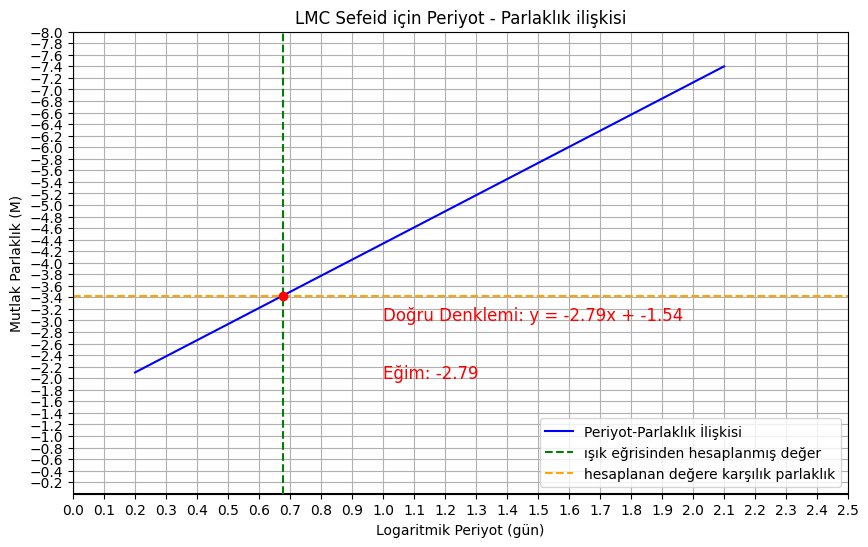

Logaritmasını aldığımız zaman değerine karşılık gelen parlaklık değeri: -3.43


In [12]:
import matplotlib.pyplot as plt
import numpy as np


y_values = np.arange(0, -8.1, -0.2) # Y eksenindeki değerler
x_values = np.arange(0, 2.6, 0.1) # X eksenindeki değerler

line_points = [(0.2, -2.1), (2.1, -7.4)] # Doğru için noktalar
line_x, line_y = zip(*line_points) # Doğruyu çizmek için x ve y koordinatlarını ayır

# Eğimi hesapla (y2 - y1) / (x2 - x1)
slope = (line_y[1] - line_y[0]) / (line_x[1] - line_x[0])

# Doğrunun denklemini oluştur y = mx + b
intercept = line_y[0] - slope * line_x[0]
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# logaritmik olarak periyod
log_average_period = np.log10(average_period)

# Doğru noktalarını tanımlayın ve eğim ile kesişme noktasını hesapla
line_points = [(0.2, -2.1), (2.1, -7.4)]
line_x, line_y = zip(*line_points)
slope = (line_y[1] - line_y[0]) / (line_x[1] - line_x[0])
interceptt = line_y[0] - slope * line_x[0]

# Verilen logaritmik periyot için karşılık gelen parlaklığı hesapla
corresponding_brightness = slope * log_average_period + interceptt

# Grafiği oluştur
plt.figure(figsize=(10, 6))

# X ve Y eksenlerini çiz
plt.plot(x_values, np.zeros_like(x_values), 'k')  # X ekseni
plt.plot(np.zeros_like(y_values), y_values, 'k')  # Y ekseni

# Doğruyu çiz
plt.plot(line_x, line_y, 'b-', label='Periyot-Parlaklık İlişkisi')

# Eğimi ve denklemi grafiğe ekle
plt.text(1, -2, f'Eğim: {slope:.2f}', fontsize=12, color='red')
plt.text(1, -3, f'Doğru Denklemi: {equation}', fontsize=12, color='red')

# Eksen değerlerini ayarla
plt.xticks(np.arange(min(x_values), max(x_values)+0.1, 0.1))
plt.yticks(np.arange(min(y_values), max(y_values)-0.1, 0.2))

# Eksen limitlerini ayarla
plt.xlim(0, 2.5)
plt.ylim(-8.0, 0)

# Mark the point with vertical and horizontal lines
plt.axvline(x=log_average_period, color='green', linestyle='--',label="ışık eğrisinden hesaplanmış değer")
plt.axhline(y=corresponding_brightness, color='orange', linestyle='--',label="hesaplanan değere karşılık parlaklık")

# kesim noktasını işaretle
plt.plot(log_average_period, corresponding_brightness, 'ro')  # red dot

# Eksen etiketlerini ekle
plt.title("LMC Sefeid için Periyot - Parlaklık ilişkisi")
plt.xlabel('Logaritmik Periyot (gün)')
plt.ylabel('Mutlak Parlaklık (M)')

# Y eksenini ters çevir
plt.gca().invert_yaxis()

# Izgara ekleyin
plt.grid(True)

# Açıklama kutusunu ekle
plt.legend(loc="lower right")

# Grafiği pdf olarak dışarı aktar
plt.savefig("LMCSefeid-logP-M.pdf")

# Grafiği göster
plt.show()
print(f"Logaritmasını aldığımız zaman değerine karşılık gelen parlaklık değeri: {corresponding_brightness:.2f}")

In [13]:
# kontrol amaçlı
x = np.log10(4.75)
# y = 2.79*x + 1.54
y = -2.79 * x - 1.54
print("Doğru denkleminden bulunmuş M parlaklık: {:.2f}".format(y))

Doğru denkleminden bulunmuş M parlaklık: -3.43


Yukarıda hesapladığımız bilgeler ile bulduklarımız;

+ $P_{LMC} = 4.75 \quad$  Işık eğrisinden elde edildi.
+ $m_{LMC} = 15^m.2 \quad$   Işık eğrisinden elde edildi.
+ $M_{LMC} = -3^m.43 \quad$  Periyot - parlaklık grafiğinden bulundu.

bu bulduklarımızdan görünür parlaklık ve mutlak parlaklığı uzaklık modülünde (pogsondan türetilir) yerine yazalım

$$m-M = 5 \log_{10} (d[pc]) - 5$$

Bu denklemi ( d ) için çözersek:

$$d = 10^{\frac{m-M+5}{5}}$$

bu deklemde d parsek cinsinden uzaklık olarak bulunur.

In [14]:
m = 15.2 # görürür parlaklık
M = -3.43  # Mutlak parlaklık
d = 10**((m-M+5)/5) # uzaklık modülü
print("LMC Sefeidinin bize olan uzaklığı {:.2e} pc dir.".format(d))
# 1000 pc = 1 kpc
print("LMC Sefeidinin bize olan uzaklığı {:.2f} kpc dir.".format(d/1000))
# 1 pc = 206265 AU
print("LMC Sefeidinin bize olan uzaklığı {:.2e} AU dir.".format(d* 206265))
# 1 pc = 3.26 ıy
print("LMC Sefeidinin bize olan uzaklığı {:.2f} ıy dır.".format(d*3.26))

LMC Sefeidinin bize olan uzaklığı 5.32e+04 pc dir.
LMC Sefeidinin bize olan uzaklığı 53.21 kpc dir.
LMC Sefeidinin bize olan uzaklığı 1.10e+10 AU dir.
LMC Sefeidinin bize olan uzaklığı 173467.29 ıy dır.


[Büyük Macellan Bulutu'na (LMC) yüzde bire kadar kesin bir mesafe](https://www.nature.com/articles/s41586-019-0999-4) bu makalede yaklaşık olarak 49.59 kiloparsek yani yaklaşık 162,000 ışık yılı bulunmuş LMC nin uzaklığını hatamı kontrol edeyim. Benim bulduğum uzaklık değeri 53.41 kpc ve ışık yılı olarak 173,473 buna göre yüzde bağıl hatamı hesapladım.

In [15]:
gerçek = 49.59 # kpc
hesap = 53.21  # kpc
et = abs(gerçek - hesap)/gerçek * 100
print(' Yüzde bağıl gerçek hata %Et: {:.2f}'.format(et))

 Yüzde bağıl gerçek hata %Et: 7.90


# Sonuç
Makaledeki bulunan değerden yaklaşık olalrak %8'lik bir hata hesapladım. Büyük Macellan Bulutsusu(LMC) içinde bir Sefeid için kabul edileblir bir uzaklık bulduğumu düşünüyorum. Hesaplarıma göre bu **Sefeidin uzaklığı 53.41 kpc** oluyor.(Hocam ödev çok eğlenceliydi teşekkürler :)))